___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>
# RNN Example for Time Series

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split

## Data

Info about this data set: https://fred.stlouisfed.org/series/TRFVOLUSM227NFWA

Read in the data set "Miles_Traveled.csv" from the Data folder. Figure out how to set the date to a datetime index columns

In [158]:
df1 = pd.read_csv('/Users/flatironschool/Downloads/UDEMY_TSA_FINAL/Data/Miles_Traveled.csv', index_col='DATE', parse_dates=True)
df1.index.freq = 'MS'

In [159]:
df1.head()

,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


**Task: Change the column names to Value**

In [160]:
df1.columns = ['Value']
df1.head()

,Value
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


**TASK: Plot out the time series**

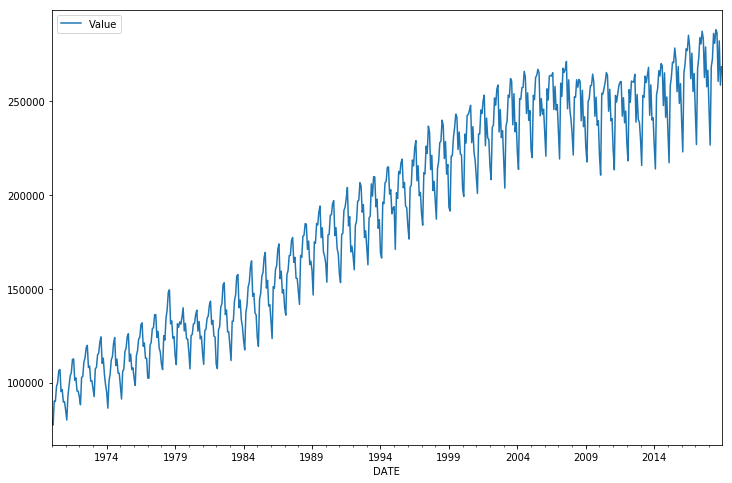

In [161]:
df1.plot(figsize=(12,8));

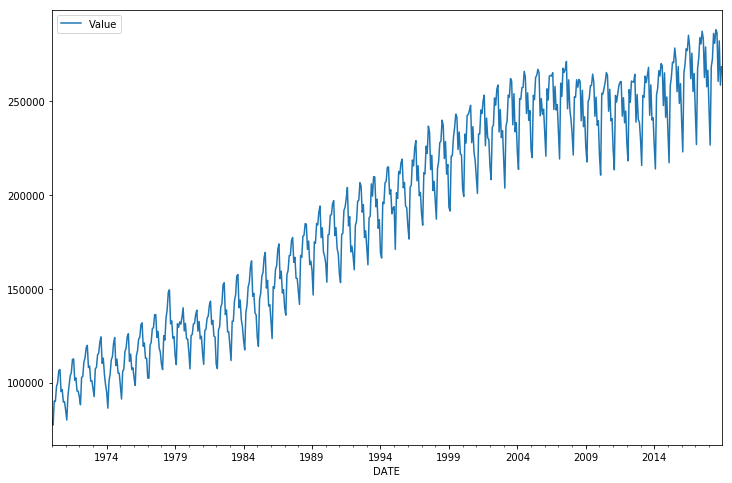

**TASK: Perform a Seasonal Decomposition on the model and plot out the ETS components**

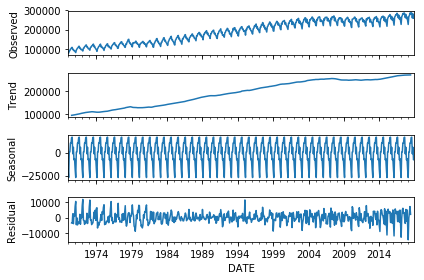

In [162]:
result = seasonal_decompose(df1['Value'], model='additive')
result.plot();

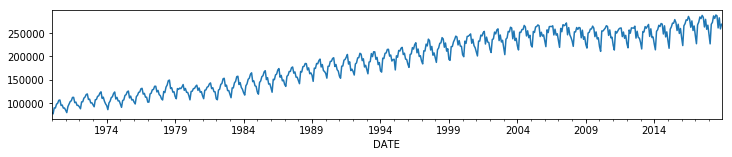

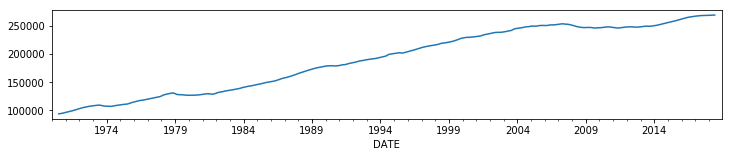

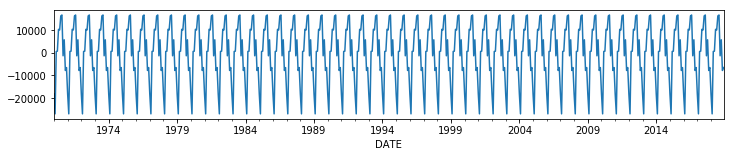

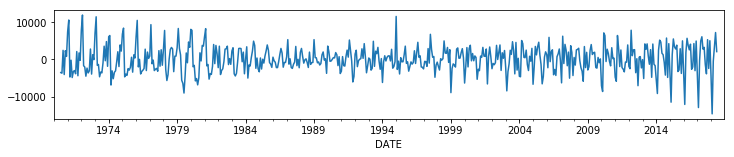

## Train Test Split

**TASK: Figure out the length of the data set**

In [163]:
len(df1)

588

588

In [164]:
588 - 12 #entire data set minus 12 months for test data

576

**TASK: Split the data into a train/test split where the test set is the last 12 months of data.**

In [165]:
train1 = df1.iloc[0:576]
test1 = df1.iloc[576:]

In [166]:
len(test1)

12

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [215]:
from sklearn.preprocessing import MinMaxScaler

In [216]:
scaler1 = MinMaxScaler()

In [217]:
scaler1.fit(train1)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [218]:
scaled_train1 = scaler1.transform(train1)
scaled_test1 = scaler1.transform(test1)

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The n_input is up to you, but at a minimum it should be at least 12.**

In [171]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [219]:
n_input = 24

In [220]:
n_features = 1 #timestamp

In [221]:
time_generator1 = TimeseriesGenerator(scaled_train1, scaled_train1, length=n_input, batch_size=1)

Using TensorFlow backend.


### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTAM units you want and a final Dense Layer.**

In [177]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [222]:
model1 = Sequential()

In [223]:
model1.add(LSTM(150, activation='relu', input_shape=(n_input,n_features)))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


**TASK: Fit the model to the generator (it should be a lot of epochs, but do as many as you have the patience for! :)**

In [224]:
model1.fit_generator(time_generator1, epochs=30)

Epoch 1/30
552/552 [==============================] - 16s 29ms/step - loss: 0.0164
Epoch 2/30
552/552 [==============================] - 15s 28ms/step - loss: 0.0064
Epoch 3/30
552/552 [==============================] - 15s 28ms/step - loss: 0.0057
Epoch 4/30
552/552 [==============================] - 15s 28ms/step - loss: 0.0057
Epoch 5/30
552/552 [==============================] - 15s 28ms/step - loss: 0.0045
Epoch 6/30
552/552 [==============================] - 15s 27ms/step - loss: 0.0030
Epoch 7/30
552/552 [==============================] - 15s 28ms/step - loss: 0.0023
Epoch 8/30
552/552 [==============================] - 15s 28ms/step - loss: 0.0020
Epoch 9/30
552/552 [==============================] - 15s 28ms/step - loss: 0.0020
Epoch 10/30
552/552 [==============================] - 15s 26ms/step - loss: 0.0018
Epoch 11/30
552/552 [==============================] - 15s 26ms/step - loss: 0.0018
Epoch 12/30
552/552 [==============================] - 15s 26ms/step - loss: 0.0018
E

Epoch 1/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0010
Epoch 2/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0011
Epoch 3/10
552/552 [==============================] - 16s 30ms/step - loss: 9.5115e-04
Epoch 4/10
552/552 [==============================] - 17s 30ms/step - loss: 8.8495e-04
Epoch 5/10
552/552 [==============================] - 17s 30ms/step - loss: 8.4229e-04
Epoch 6/10
552/552 [==============================] - 16s 30ms/step - loss: 0.0012
Epoch 7/10
552/552 [==============================] - 17s 30ms/step - loss: 8.6496e-04
Epoch 8/10
552/552 [==============================] - 17s 30ms/step - loss: 7.5506e-04
Epoch 9/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0010
Epoch 10/10
552/552 [==============================] - 16s 30ms/step - loss: 0.0010


**TASK: Plot the history of the loss that occured during training.**

In [225]:
epoch_loss = model1.history.history['loss']

dict_keys(['loss'])

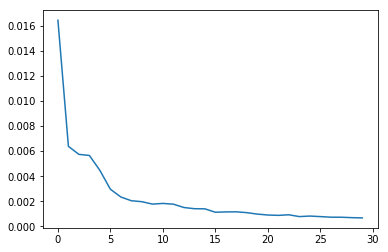

In [226]:
plt.plot(range(len(epoch_loss)), epoch_loss)

## Evaluate on Test Data

**TASK: Based on your test data and input size, create an appropriate;y sized "first evaluation batch" like we did in the lecture.**

In [227]:
first_eval_batch1 = scaled_train1[-12:]

In [228]:
first_eval_batch1

array([[0.79630397],
       [0.71226435],
       [0.90477416],
       [0.93121043],
       [0.98386382],
       [0.96757519],
       [1.        ],
       [0.9801859 ],
       [0.8824684 ],
       [0.95995255],
       [0.85883345],
       [0.90086755]])

array([[0.79630397],
       [0.71226435],
       [0.90477416],
       [0.93121043],
       [0.98386382],
       [0.96757519],
       [1.        ],
       [0.9801859 ],
       [0.8824684 ],
       [0.95995255],
       [0.85883345],
       [0.90086755]])

**TASK: Generate predictions into the same time stamps as the test set**

In [229]:
test_predictions1 = []
first_eval_batch1 = scaled_train1[-n_input:]

current_batch1 = first_eval_batch1.reshape((1, n_input, n_features))

In [230]:
for i in range(len(test1)):
    current_pred1 = model1.predict(current_batch1)[0]
    test_predictions1.append(current_pred1)
    current_batch1 = np.append(current_batch1[:, 1:, :], [[current_pred1]], axis=1)

## Inverse Transformations and Compare

**TASK: Inverse Transform your new forecasted predictions.**

In [231]:
true_predictions1 = scaler1.inverse_transform(test_predictions1)

In [233]:
true_predictions1

array([[246155.74189568],
       [234174.43629313],
       [273974.74169576],
       [275835.11345816],
       [288789.98083735],
       [287924.36461186],
       [295816.57563293],
       [290224.35051155],
       [278836.89557326],
       [285212.53916037],
       [267698.86141706],
       [271446.55379641]])

array([[246787.65124869],
       [235267.94174141],
       [258981.00705367],
       [269320.52187717],
       [280305.23281485],
       [283555.27218211],
       [288203.31152987],
       [283559.36330348],
       [271973.99567699],
       [276999.53167695],
       [261872.87937891],
       [264047.44175631]])

**TASK: Create a new dataframe that has both the original test values and your predictions for them.**

In [241]:
test1['Predictions'] = true_predictions1
test1

,Value,Predictions
DATE,,
2018-01-01,245695.0,246155.741896
2018-02-01,226660.0,234174.436293
2018-03-01,268480.0,273974.741696
2018-04-01,272475.0,275835.113458
2018-05-01,286164.0,288789.980837
2018-06-01,280877.0,287924.364612
2018-07-01,288145.0,295816.575633
2018-08-01,286608.0,290224.350512
2018-09-01,260595.0,278836.895573


,Value,Predictions
DATE,,
2018-01-01,245695.0,246787.651249
2018-02-01,226660.0,235267.941741
2018-03-01,268480.0,258981.007054
2018-04-01,272475.0,269320.521877
2018-05-01,286164.0,280305.232815
2018-06-01,280877.0,283555.272182
2018-07-01,288145.0,288203.311530
2018-08-01,286608.0,283559.363303
2018-09-01,260595.0,271973.995677


**TASK: Plot out the test set against your own predicted values.**

In [2]:
# CODE HERE

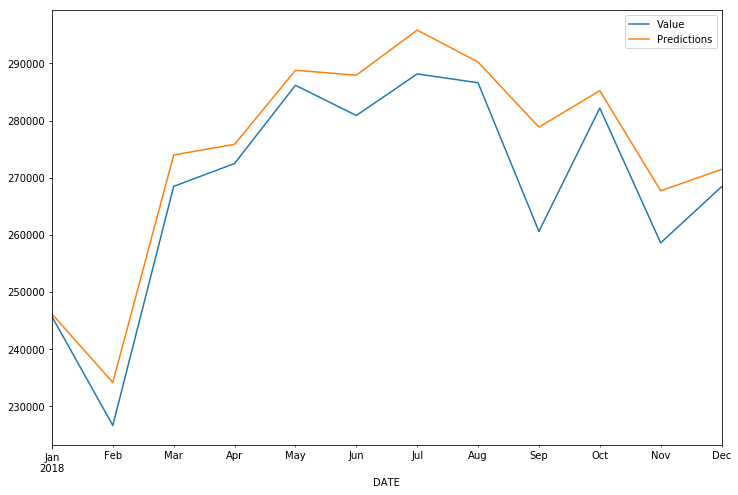

In [247]:
test1.plot(figsize=(12,8));

# Saving Models

**TASK: Optional, Save your model!**

In [44]:
model.save('RNN_Solutions')